In [4]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(font="monospace")

In [9]:
# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)


network           1                       2                     3             \
node              1                       1                     1              
hemi             lh          rh          lh         rh         lh         rh   
0         56.055744   92.031036    3.391576  38.659683  26.203819 -49.715569   
1         55.547253   43.690075  -65.495987 -13.974523 -28.274963 -39.050129   
2         60.997768   63.438793  -51.108582 -13.561346 -18.842947  -1.214659   
3         18.514868   12.657158  -34.576603 -32.665958  -7.420454  17.119448   
4         -2.527392  -63.104668  -13.814151 -15.837989 -45.216927   3.483550   
5        -24.906792  -51.191895  -29.867994 -27.840294 -24.455107  47.115761   
6         17.273710    0.540083   18.649370  -9.105489  -2.117226  87.957710   
7         20.712934   10.650232    9.156902 -15.880466   1.948806  51.916603   
8         48.215309   46.369450   30.311281  21.030554 -14.135849  13.317879   
9          2.632546   33.998898    8.142659  42.572460   0.644133   9.879410   
10        25.925964  -15.774749   54.659813  80.348549  27.536982  47.937374   
11       -56.421814  -74.313713  -22.430784  22.268995  29.032286  73.269424   
12       -20.486719  -18.707275   -8.405787  10.911598   6.834342  33.627548   
13       -29.466019  -38.972973  -44.623367 -15.115207 -12.154548  -7.261045   
14        -4.389784  -47.513359   37.163383  -2.465017   1.309325 -23.852072   
15       -18.445438  -13.101379   29.976654  23.518087   2.768352 -34.169147   
16        -4.452083   17.155952   33.558407  34.397972  -5.863379   9.208533   
17       -39.546295  -18.957148   -7.976241  -3.531079  -5.773846   9.264918   
18       -46.291134   11.078963  -45.228870  -2.845282  -6.179867  20.131891   
19        -5.899357    4.405512    0.080728   1.270900   1.275138   7.154182   
20         0.560453   35.866219   24.450027  31.679840  16.254498  90.163155   
21       -19.945114   24.615583   49.798931  30.973711  10.343500  13.126060   
22       -16.305347  -15.824549   37.724072  47.291103  -3.805740 -56.306465   
23       -18.826845  -31.083115   -6.768690 -34.910385   6.819852 -77.991852   
24       -68.351372  -47.328667  -10.660748 -17.210674  15.157654 -85.323883   
25       -41.239174  -36.231346    8.018161 -29.044682  -2.452334 -74.277328   
26       -37.635246  -32.697514   35.461830 -22.198782   5.855732 -79.205887   
27        -7.205924  -22.471235   -3.246131 -30.879417 -20.528399 -82.332359   
28        20.751831   -7.137496   16.544254 -30.701252  22.778231 -83.647842   
29       -15.386735  -27.222279   36.951057   2.286964  25.375914 -22.884146   
..              ...         ...         ...        ...        ...        ...   
890      -21.066452   -7.763554    5.813338  26.766722   3.434278  24.014647   
891        4.738699   -0.531491  -24.333563  12.450525   8.395144  16.778339   
892      -15.034314    7.501511   -3.909041   2.961851  20.520329   3.353428   
893       -2.246749    8.323643  -34.524612 -16.084988  -2.813310  -9.039646   
894       30.750069   10.525861  -43.919830 -29.727776  -7.223209  -7.573327   
895      163.615540  152.108368  111.501564  81.281372 -21.596678  -8.815574   
896       24.541935  -29.396801  -77.736732 -36.493420  25.047535   1.863015   
897     -109.933723 -103.237183  -55.536781 -34.571960  21.071434  11.164051   
898     -108.607208 -104.835846  -41.391678 -42.093185   4.437909  27.703983   
899     -112.576164  -98.228836   -4.219810  -4.817594  43.134716  51.471874   
900      -33.652763  -34.227898   41.866615  13.277394  38.052265  42.057190   
901      -17.347198  -33.566647   10.761894 -21.481064  42.512058  82.237091   
902      -13.736854  -35.782627  -25.390673 -16.989786  13.662337  92.381088   
903      -18.138809  -26.413460   -2.212636  -3.235288   6.499053  76.702705   
904        5.245887   -1.838824   15.719844  -5.537140  -2.017576  43.350071   
905       10.630086    9.432680   17.886751   1.664860 -11.843624   0.269342   


In [10]:
print ( type(df) )

pandas.core.frame.DataFrame

In [5]:

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

In [6]:
# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, used_networks), network_pal))

In [ ]:
# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)



In [ ]:
# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)


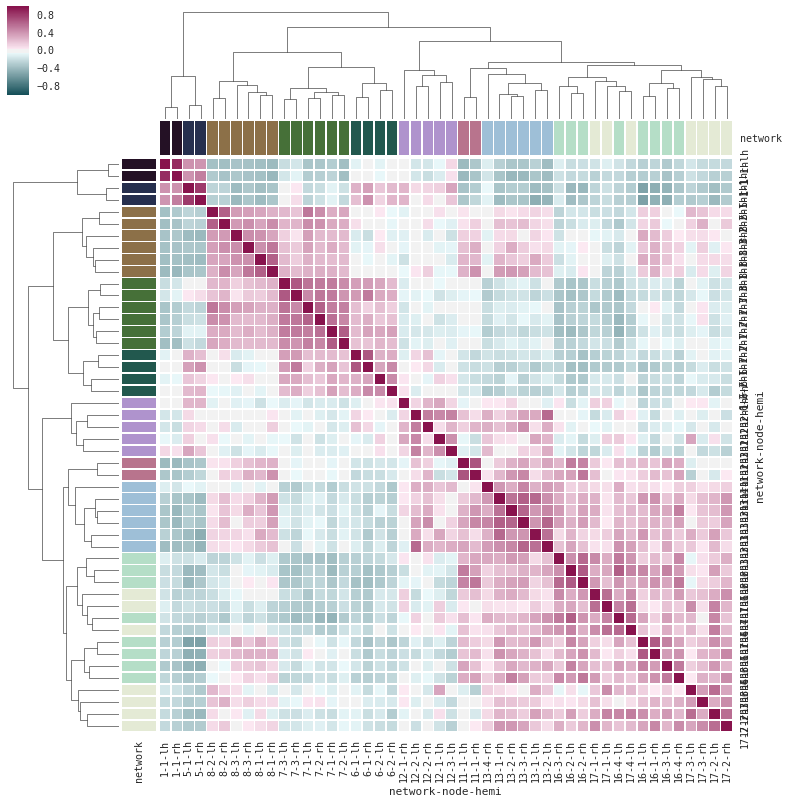

In [7]:

# Draw the full plot
sns.clustermap(df.corr(), row_colors=network_colors, linewidths=.5,
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)